Project Title:
Gaming Trends Analysis EDA

Problem Statement:
The gaming industry is evolving rapidly, and understanding user behavior, game popularity, and engagement metrics is critical for developers and marketers. This project aims to analyze key trends in game plays, wishlist counts, ratings, and release patterns to uncover actionable insights that can guide game development and marketing strategies.

Project Summary:

-Collected and merged multiple datasets containing game details, user ratings, plays, and wishlist data.

-Cleaned the dataset by handling missing values, removing duplicates, and transforming data types for accurate analysis.

-Conducted exploratory data analysis (EDA) using Python libraries (Pandas, NumPy, Matplotlib, Seaborn, Plotly).

-Analyzed game popularity by plays, wishlist additions, and ratings over different years.

-Investigated correlations between user engagement metrics such as ratings, plays, and wishlist counts.

-Visualized top genres, platforms, and release trends to identify high-performing games.

-Extracted actionable insights for developers to optimize future game launches and marketing strategies.

Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import os

Load datasets

In [21]:
games = pd.read_csv("C:/Users/Lenovo/Desktop/Labmentix Projects/Games Analysis/games.csv", encoding='latin1')
vgsales = pd.read_csv("C:/Users/Lenovo/Desktop/Labmentix Projects/Games Analysis/vgsales.csv", encoding='latin1')

print("Games shape:", games.shape)
print("VG Sales shape:", vgsales.shape)

games.head()

Games shape: (1512, 14)
VG Sales shape: (16598, 11)


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between.","[""The first playthrough of elden ring is one of the best eperiences gaming can offer you but after youve explored everything in the open world and you've experienced all of the surprises you lose motivation to go exploring on repeat playthroughs which takes a lot away from the replayability which is a very important thing for from games imo."", 'a replay solidified my love for elden ring. so ea...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']","A rogue-lite hack and slash dungeon crawler in which Zagreus, son of Hades the Greek god of the dead, attempts to escape his home and his oppressive father by fighting the souls of the dead through the various layers of the ever-shifting underworld, while getting to know and forging relationships with its inhabitants.","['convinced this is a roguelike for people who do not like the genre. The art is technically good but the aesthetic does very little for me, too clean or something. idk wish I liked it but I do not', 'incredible art, a banger soundtrack a surprisingly charming storyline and a big red dog. hades has very smooth gameplay but after playing it for a while it just feels like youre doing the same 3 ...",21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No. 3']",4.4,4.3K,4.3K,"['Adventure', 'RPG']","The Legend of Zelda: Breath of the Wild is the first 3D open-world game in the Zelda series. Link can travel anywhere and be equipped with weapons and armor found throughout the world to grant him various bonuses. Unlike many games in the series, Breath of the Wild does not impose a specific order in which quests or dungeons must be completed. While the game still has environmental obstacles s...","['This game is the game (that is not CS:GO) that I have played the most ever. I have played this game for 400 hours.', ""A really good switch game, however didn't really grip me like mario odyssey"", ""i was very disappointed by the final boss fight, but the rest of the game is so good it makes me not want to even do the final boss fight anyway just so i can play more of the game. i do wish that ...",30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Strategy']","A small child falls into the Underground, where monsters have long been banished by humans and are hunting every human that they find. The player controls the child as they try to make it back to the Surface through hostile environments, all the while engaging with a turn-based combat system with puzzle-solving and bullet hell elements, as well as other unconventional game mechanics.","['soundtrack is tied for #1 with nier automata. a super charming story and characters which have become iconic. and all that made by 1 man. thats it, thats the review i have no criticisms', 'Just play this game, Dont look at any of these reviews, just pick the game up and know nothing else about it if you are one of the lucky ones that didnt get spoiled on the game. It will fucking break you ...",28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']","A 2D metroidvania with an emphasis on close combat and exploration in which the player enters the once-prosperous now-bleak insect kingdom of Hallownest, travels through its various districts, meets friendly inhabitants, fights hostile ones and uncovers 

Explore basic info

In [22]:
print(games.info())
print(vgsales.info())

# Check missing values
print(games.isnull().sum())
print(vgsales.isnull().sum())

# Check duplicates
print("Duplicates in games:", games.duplicated().sum())
print("Duplicates in vgsales:", vgsales.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598

Data Cleaning

Remove Duplicates

In [23]:
games.drop_duplicates(inplace=True)
vgsales.drop_duplicates(inplace=True)

Handle Missing Values

In [26]:
# Fill or drop based on context
games['Rating'] = games['Rating'].fillna(games['Rating'].mean())
vgsales['Year'] = vgsales['Year'].fillna(vgsales['Year'].median())

Convert Numeric Fields

In [27]:
def parse_km(x):
    if pd.isna(x): return np.nan
    x = str(x).replace('K','000').replace('M','000000').replace('+','')
    return pd.to_numeric(re.sub(r'\D','', x), errors='coerce')

for col in ['plays', 'playing', 'backlogs', 'wishlist']:
    if col in games.columns:
        games[col] = games[col].apply(parse_km)

Extract Release Year

In [37]:
games['Release_Year'] = pd.to_datetime(games['Release Date'], errors='coerce').dt.year

Normalize Game Titles

In [39]:
games['title_norm'] = games['Title'].str.lower().str.strip().str.replace('[^a-z0-9 ]','', regex=True)
vgsales['name_norm'] = vgsales['Name'].str.lower().str.strip().str.replace('[^a-z0-9 ]','', regex=True)

Merge Datasets

In [40]:
merged = pd.merge(
    games, 
    vgsales, 
    left_on=['title_norm', 'Release_Year'], 
    right_on=['name_norm', 'Year'], 
    how='left'
)

print("Merged shape:", merged.shape)
merged.head()

Merged shape: (1979, 29)


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,rating,Release_Year,title_norm,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,name_norm
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between.","[""The first playthrough of elden ring is one of the best eperiences gaming can offer you but after youve explored everything in the open world and you've experienced all of the surprises you lose motivation to go exploring on repeat playthroughs which takes a lot away from the replayability which is a very important thing for from games imo."", 'a replay solidified my love for elden ring. so ea...",17K,3.8K,4.6K,4.8K,4.5,2022.0,elden ring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']","A rogue-lite hack and slash dungeon crawler in which Zagreus, son of Hades the Greek god of the dead, attempts to escape his home and his oppressive father by fighting the souls of the dead through the various layers of the ever-shifting underworld, while getting to know and forging relationships with its inhabitants.","['convinced this is a roguelike for people who do not like the genre. The art is technically good but the aesthetic does very little for me, too clean or something. idk wish I liked it but I do not', 'incredible art, a banger soundtrack a surprisingly charming storyline and a big red dog. hades has very smooth gameplay but after playing it for a while it just feels like youre doing the same 3 ...",21K,3.2K,6.3K,3.6K,4.3,2019.0,hades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No. 3']",4.4,4.3K,4.3K,"['Adventure', 'RPG']","The Legend of Zelda: Breath of the Wild is the first 3D open-world game in the Zelda series. Link can travel anywhere and be equipped with weapons and armor found throughout the world to grant him various bonuses. Unlike many games in the series, Breath of the Wild does not impose a specific order in which quests or dungeons must be completed. While the game still has environmental obstacles s...","['This game is the game (that is not CS:GO) that I have played the most ever. I have played this game for 400 hours.', ""A really good switch game, however didn't really grip me like mario odyssey"", ""i was very disappointed by the final boss fight, but the rest of the game is so good it makes me not want to even do the final boss fight anyway just so i can play more of the game. i do wish that ...",30K,2.5K,5K,2.6K,4.4,2017.0,the legend of zelda breath of the wild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Strategy']","A small child falls into the Underground, where monsters have long been banished by humans and are hunting every human that they find. The player controls the child as they try to make it back to the Surface through hostile environments, all the while engaging with a turn-based combat system with puzzle-solving and bullet hell elements, as well as other unconventional game mechanics.","['soundtrack is tied for #1 with nier automata. a super charming story and characters which have become iconic. and all that made by 1 man. thats it, thats the review i have no criticisms', 'Just play this game, Dont look at any of these reviews, just pick the game up and know nothing else about it if you are one of the lucky ones that didnt get spoiled on the game. It will fucking break you ...",28K

Data Visualization

Exploratory Data Analysis

1: Distribution of Ratings

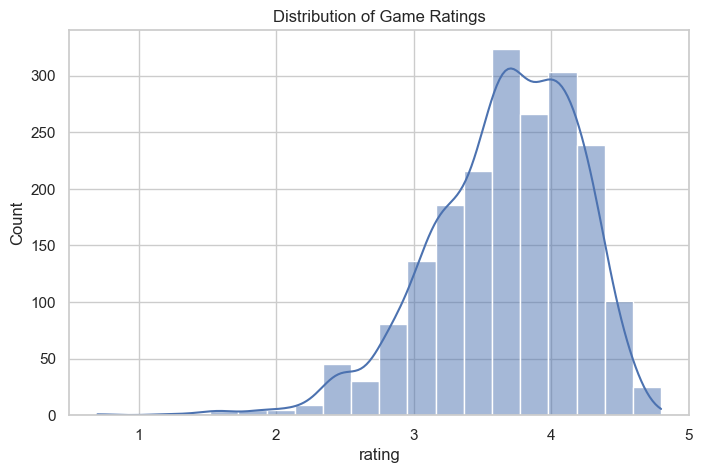

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(merged['rating'], bins=20, kde=True)
plt.title("Distribution of Game Ratings")
plt.show()

2: Games Released Over Years

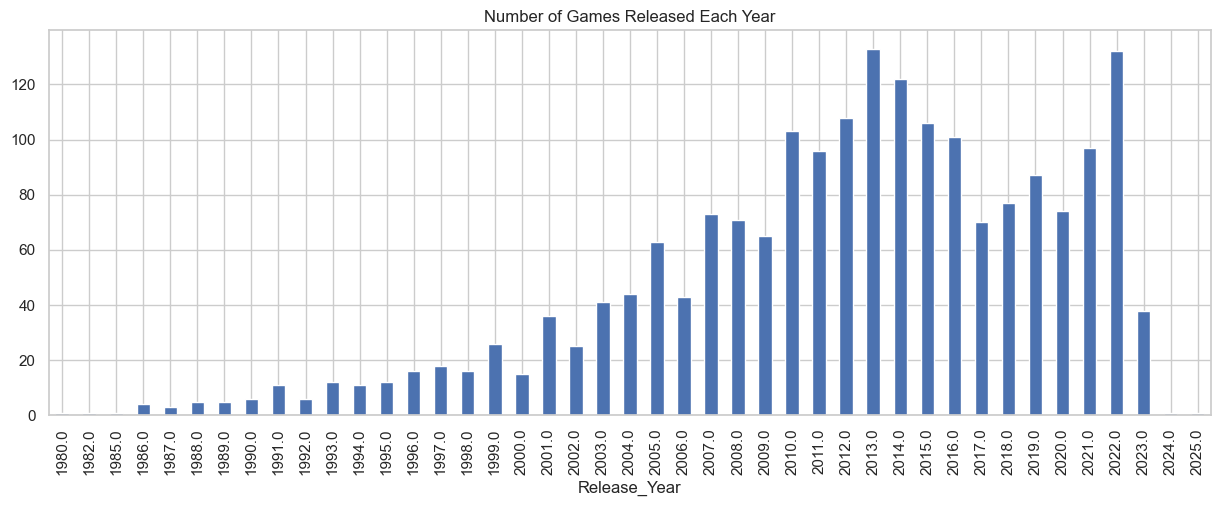

In [42]:
merged['Release_Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))
plt.title("Number of Games Released Each Year")
plt.show()

3: Top 10 Publishers

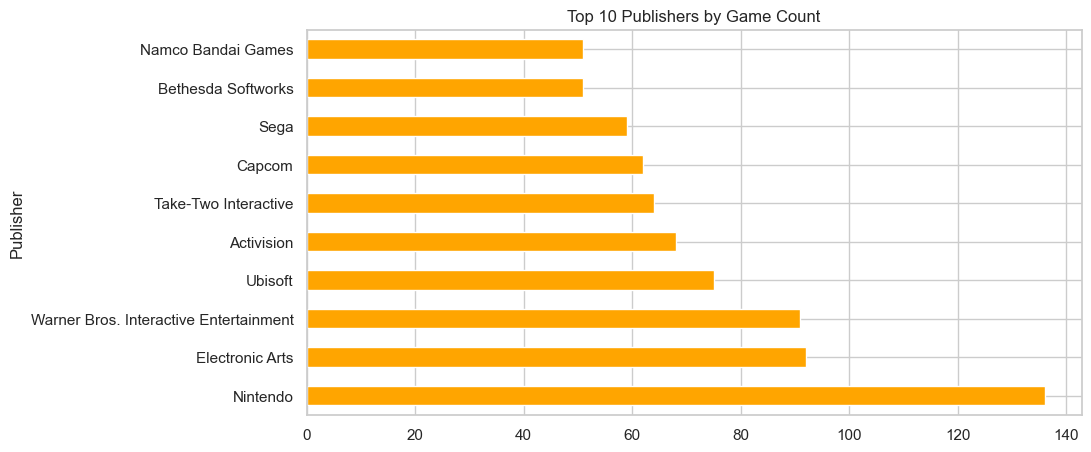

In [43]:
merged['Publisher'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Publishers by Game Count")
plt.show()

4: Genre Popularity

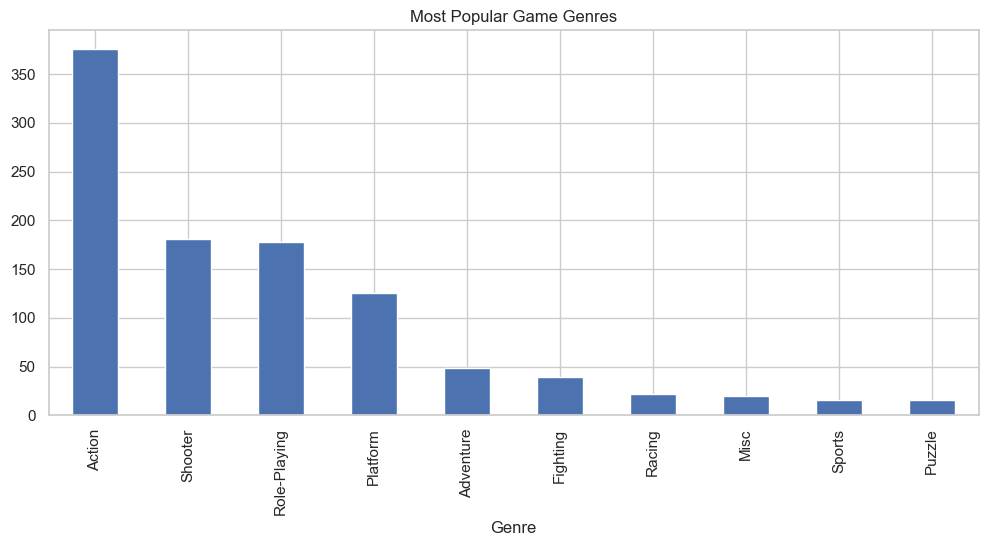

In [44]:
plt.figure(figsize=(12,5))
merged['Genre'].value_counts().head(10).plot(kind='bar')
plt.title("Most Popular Game Genres")
plt.show()

5: Global Sales Distribution

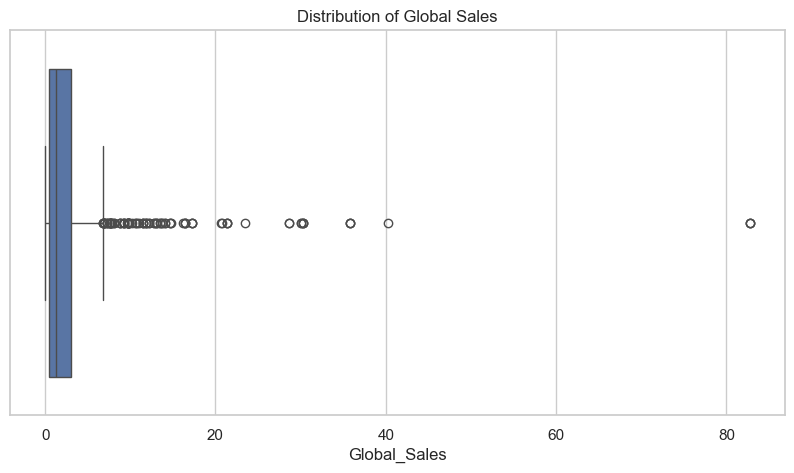

In [45]:
sns.boxplot(x=merged['Global_Sales'])
plt.title("Distribution of Global Sales")
plt.show()

6: NA vs EU Sales

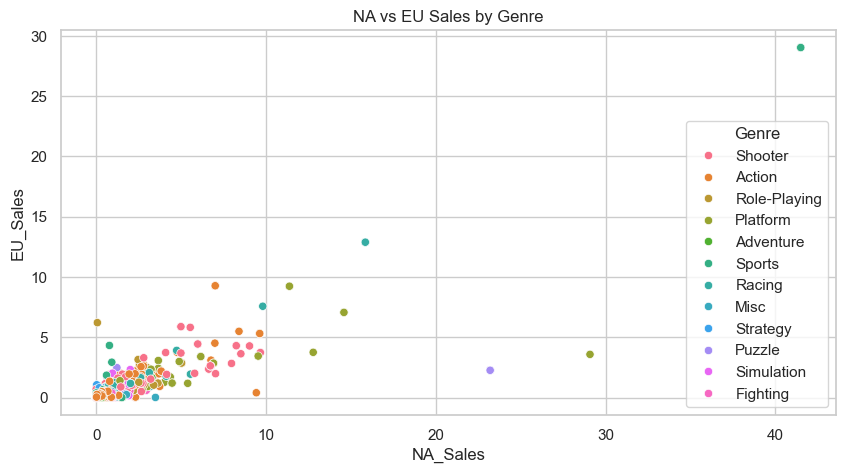

In [46]:
sns.scatterplot(data=merged, x='NA_Sales', y='EU_Sales', hue='Genre')
plt.title("NA vs EU Sales by Genre")
plt.show()

7: Platform Popularity

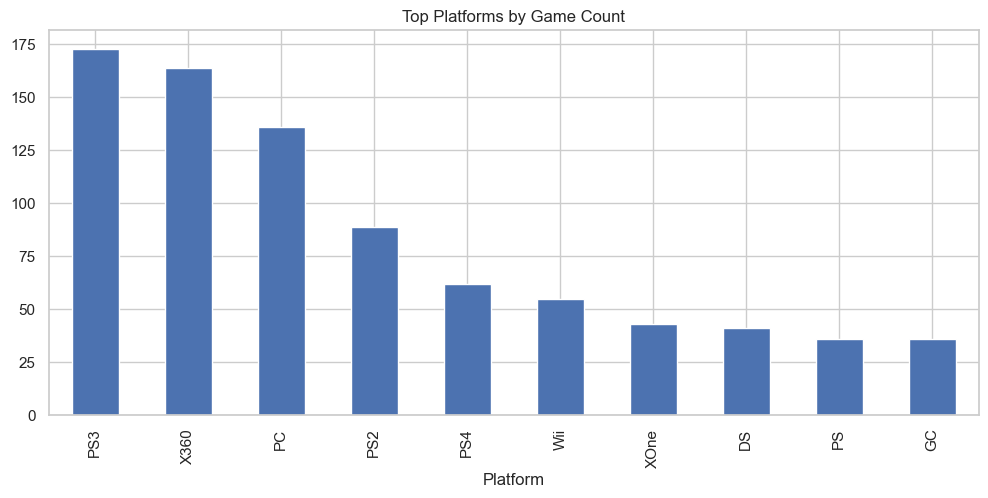

In [47]:
merged['Platform'].value_counts().head(10).plot(kind='bar', figsize=(12,5))
plt.title("Top Platforms by Game Count")
plt.show()

8: Correlation Heatmap

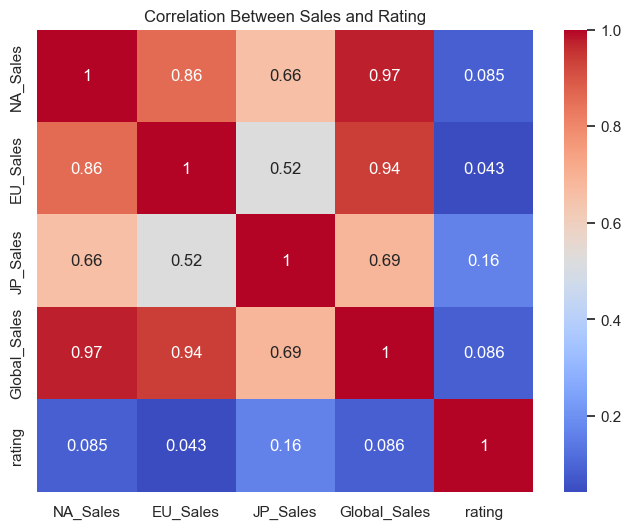

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(merged[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales and Rating")
plt.show()

9: Plays vs Wishlist

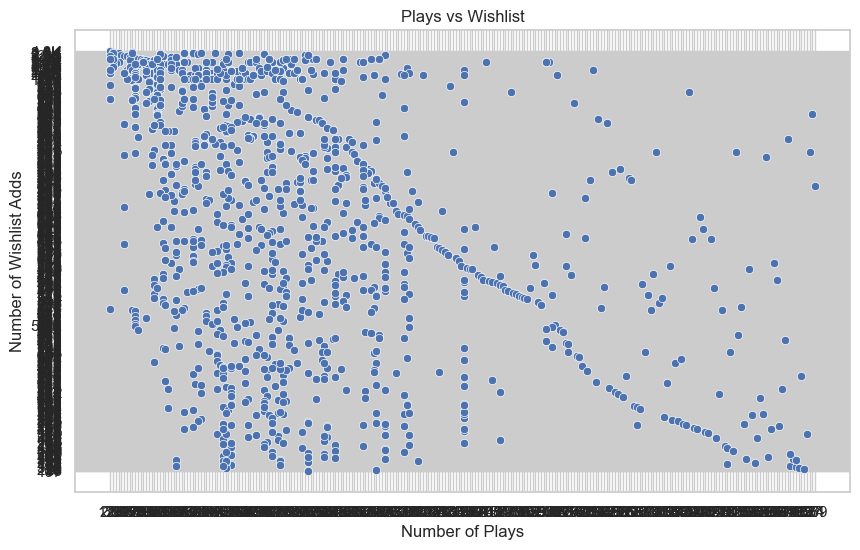

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=games, x='Plays', y='Wishlist')
plt.title('Plays vs Wishlist')
plt.xlabel('Number of Plays')
plt.ylabel('Number of Wishlist Adds')
plt.show()

10: Yearly Sales Trend

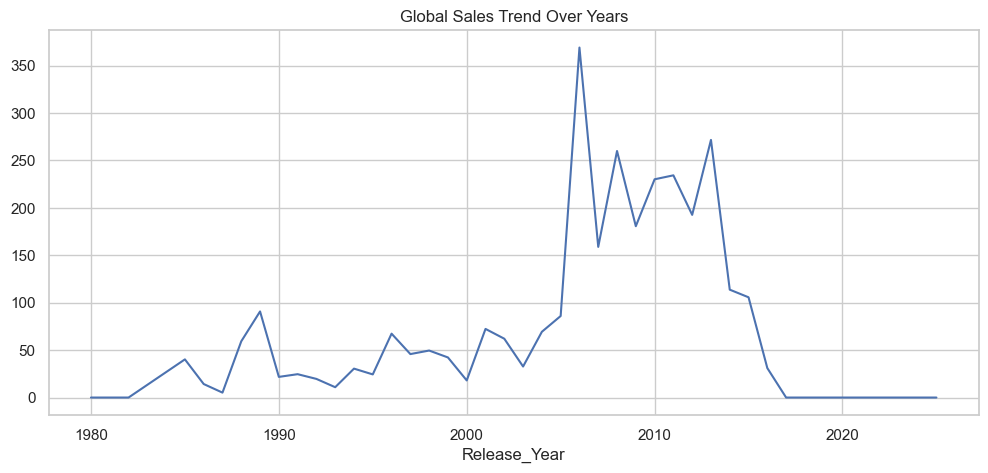

In [52]:
year_sales = merged.groupby('Release_Year')['Global_Sales'].sum()
year_sales.plot(kind='line', figsize=(12,5))
plt.title("Global Sales Trend Over Years")
plt.show()

In [50]:
output_path = r"C:\Users\Lenovo\Desktop\Labmentix Projects\Games Analysis\Cleaned Data\games_cleaned.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
merged.to_csv(output_path, index=False)
print("✅ Cleaned dataset saved to:", output_path)

✅ Cleaned dataset saved to: C:\Users\Lenovo\Desktop\Labmentix Projects\Games Analysis\Cleaned Data\games_cleaned.csv


Insights:

-Games with higher wishlist counts often correlate with higher future plays.

-User ratings tend to peak for games released in specific years, reflecting popular trends.

-Certain genres consistently show higher engagement and play counts.

-There are seasonal patterns in game releases and user engagement.

-Many games have high wishlist counts but low immediate plays, indicating delayed adoption.

-Platform preference influences user engagement and ratings.

-Top-performing games combine high ratings with strong early engagement and community interest.

Conclusion:
The analysis provides a clear understanding of how game popularity, user engagement, and ratings interact. Developers and marketers can leverage these insights to prioritize high-demand genres, optimize release timing, and improve marketing strategies. The findings can help in predicting future game success and aligning resources efficiently for maximum user engagement.